In [2]:
! pip install pandas numpy matplotlib seaborn 

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached seaborn-0.13.2

# IMPORT PACKAGES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATASET

In [11]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [12]:
train_df.head()

,trafficSource.isTrueDirect,purchaseValue,browser,device.screenResolution,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,device.mobileDeviceBranding,...,device.language,deviceType,userChannel,device.browserVersion,totalHits,device.screenColors,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,not available in demo dataset,NaN,NaN,medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1500100799,Americas,False,1.0
1,True,0.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,1,not available in demo dataset,1495262065,Americas,False,1.0
2,True,0.0,Chrome,not available in demo dataset,NaN,(not provided),medium,Region_2,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Organic Search,not available in demo dataset,6,not available in demo dataset,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,not available in demo dataset,NaN,NaN,medium,Region_4,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Social,not available in demo dataset,1,not available in demo dataset,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,not available in demo dataset,NaN,NaN,medium,Region_3,NaN,not available in demo dataset,...,not available in demo dataset,desktop,Direct,not available in demo dataset,66,not available in demo dataset,1475804633,Americas,False,1.0


In [14]:
test_df.head()

,userChannel,date,browser,device.browserSize,device.browserVersion,deviceType,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,...,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,browserMajor,screenSize,gclIdPresent
0,Social,20170508,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,not available in demo dataset,medium,0
1,Organic Search,20170405,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1491433811,1,1491433811,6394,8,Region_1,not available in demo dataset,medium,0
2,Organic Search,20170308,Safari,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,google,1489001815,1,1489001815,38969,8,Region_5,not available in demo dataset,medium,0
3,Referral,20171113,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,not available in demo dataset,medium,0
4,Organic Search,20161212,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,...,(direct),1481559809,1,1481559809,69453,8,Region_3,not available in demo dataset,medium,0


# INFORMATION ABOUT TRAIN DATASET

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

# INFORMATION ABOUT TEST DATASET

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29006 entries, 0 to 29005
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   userChannel                                   29006 non-null  object 
 1   date                                          29006 non-null  int64  
 2   browser                                       29006 non-null  object 
 3   device.browserSize                            29006 non-null  object 
 4   device.browserVersion                         29006 non-null  object 
 5   deviceType                                    29006 non-null  object 
 6   device.flashVersion                           29006 non-null  object 
 7   device.isMobile                               29006 non-null  bool   
 8   device.language                               29006 non-null  object 
 9   device.mobileDeviceBranding                   29006 non-null 

In [18]:
train_df.isnull().sum()

trafficSource.isTrueDirect                       73133
purchaseValue                                        0
browser                                              0
device.screenResolution                              0
trafficSource.adContent                         113060
trafficSource.keyword                            71861
screenSize                                           0
geoCluster                                           0
trafficSource.adwordsClickInfo.slot             111742
device.mobileDeviceBranding                          0
device.mobileInputSelector                           0
userId                                               0
trafficSource.campaign                               0
device.mobileDeviceMarketingName                     0
geoNetwork.networkDomain                             0
gclIdPresent                                         0
device.operatingSystemVersion                        0
sessionNumber                                        0
device.fla

## Unique values per col function


In [52]:
import pandas as pd

def get_unique_values_per_column(df):
    """
    Prints unique value counts for each object-type column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.
    """
    unique_values = {}

    for col in df.select_dtypes(include='object').columns:
        # value_counts(dropna=False) includes NaN in the count
        value_counts = df[col].value_counts(dropna=False).to_dict()
        unique_values[col] = value_counts

    for col, value_dict in unique_values.items():
        print(f"Column: {col}")
        print(f"Unique Values ({len(value_dict)}): {value_dict}")
        print("-" * 50)

    return unique_values  # Optional: return the dictionary if you want to use it later

In [53]:
unique_train_values = get_unique_values_per_column(train_df)

Column: trafficSource.isTrueDirect
Unique Values (2): {nan: 73133, True: 42890}
--------------------------------------------------
Column: browser
Unique Values (34): {'Chrome': 84508, 'Safari': 19184, 'Firefox': 4031, 'Internet Explorer': 2155, 'Android Webview': 1472, 'Edge': 1216, 'Safari (in-app)': 793, 'Opera Mini': 733, 'Samsung Internet': 563, 'Opera': 548, 'UC Browser': 296, 'YaBrowser': 187, 'Amazon Silk': 73, 'Coc Coc': 61, 'Android Browser': 59, 'Mozilla Compatible Agent': 36, 'MRCHROME': 22, 'Nintendo Browser': 20, 'Maxthon': 17, 'BlackBerry': 16, 'Nokia Browser': 8, 'Puffin': 7, 'Iron': 3, 'osee2unifiedRelease': 2, 'Seznam': 2, 'Playstation Vita Browser': 2, 'LYF_LS_4002_12': 2, ';__CT_JOB_ID__:85da5736-a78e-45a9-837e-f5a53e5cd725;': 1, '(not set)': 1, 'Mozilla': 1, 'Browser': 1, 'MQQBrowser': 1, 'M5': 1, 'no-ua': 1}
--------------------------------------------------
Column: device.screenResolution
Unique Values (1): {'not available in demo dataset': 116023}
--------------

In [54]:
unique_test_values = get_unique_values_per_column(test_df)

Column: userChannel
Unique Values (8): {'Organic Search': 11729, 'Referral': 5449, 'Social': 5162, 'Direct': 4726, 'Paid Search': 870, 'Display': 616, 'Affiliates': 450, '(Other)': 4}
--------------------------------------------------
Column: browser
Unique Values (26): {'Chrome': 21152, 'Safari': 4831, 'Firefox': 958, 'Internet Explorer': 548, 'Android Webview': 349, 'Edge': 287, 'Opera Mini': 197, 'Safari (in-app)': 192, 'Samsung Internet': 162, 'Opera': 142, 'UC Browser': 59, 'YaBrowser': 42, 'Amazon Silk': 21, 'Mozilla Compatible Agent': 15, 'Coc Coc': 13, 'Android Browser': 13, 'MRCHROME': 6, 'BlackBerry': 4, 'Maxthon': 3, 'Puffin': 3, 'Nintendo Browser': 2, 'Nokia Browser': 2, 'osee2unifiedRelease': 2, 'ThumbSniper': 1, 'YE': 1, 'Lunascape': 1}
--------------------------------------------------
Column: device.browserSize
Unique Values (1): {'not available in demo dataset': 29006}
--------------------------------------------------
Column: device.browserVersion
Unique Values (1): {

# DATA CLEANING

In [25]:
# Exclude 'PurchaseValue' from train columns
train_cols = set(train_df.columns) - {'purchaseValue'}
test_cols = set(test_df.columns)

# Columns in train but not in test
only_in_train = train_cols - test_cols

print("🟠 Columns in train (excluding 'PurchaseValue') but NOT in test:")
print(sorted(only_in_train))

🟠 Columns in train (excluding 'PurchaseValue') but NOT in test:
[]


## Drop not available in demo dataset function


In [32]:
def drop_not_available(df):
    """
    Drop columns where all values are exactly 'not available in demo dataset'
    """
    return df.drop(columns=[col for col in df.columns if (df[col] == 'not available in demo dataset').all()])

In [33]:
cleaned_train_df = drop_not_available(train_df)
cleaned_test_df = drop_not_available(test_df)

In [34]:
cleaned_train_df

,trafficSource.isTrueDirect,purchaseValue,browser,trafficSource.adContent,trafficSource.keyword,screenSize,geoCluster,trafficSource.adwordsClickInfo.slot,userId,trafficSource.campaign,...,trafficSource.referralPath,totals.bounces,date,deviceType,userChannel,totalHits,sessionStart,geoNetwork.continent,device.isMobile,new_visits
0,NaN,0.0,Edge,NaN,NaN,medium,Region_2,NaN,61421,(not set),...,/intl/hr/yt/about/,1.0,20170714,desktop,Social,1,1500100799,Americas,False,1.0
1,True,0.0,Chrome,NaN,NaN,medium,Region_3,NaN,72287,(not set),...,NaN,1.0,20170519,desktop,Direct,1,1495262065,Americas,False,1.0
2,True,0.0,Chrome,NaN,(not provided),medium,Region_2,NaN,25180,(not set),...,NaN,NaN,20171020,desktop,Organic Search,6,1508510328,Europe,False,NaN
3,NaN,0.0,Internet Explorer,NaN,NaN,medium,Region_4,NaN,41295,(not set),...,/yt/about/ja/,1.0,20170103,desktop,Social,1,1483431838,Asia,False,1.0
4,True,88950000.0,Chrome,NaN,NaN,medium,Region_3,NaN,113697,(not set),...,NaN,NaN,20161006,desktop,Direct,66,1475804633,Americas,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116018,NaN,35180000.0,Chrome,NaN,NaN,medium,Region_3,NaN,109014,(not set),...,/,NaN,20170717,desktop,Referral,28,1500318402,Americas,False,1.0
116019,True,0.0,Chrome,NaN,NaN,medium,Region_5,NaN,66111,(not set),...,NaN,1.0,20161108,desktop,Direct,1,1478624150,Americas,False,1.0
116020,True,0.0,Chrome,NaN,NaN,medium,Region_1,NaN,97614,(not set),...,/google-analytics-launches-public-demo-account...,1.0,20160805,desktop,Referral,1,1470384216,Asia,False,NaN
116021,NaN,0.0,Chrome,NaN,(not provided),medium,Region_5,NaN,71050,(not set),...,NaN,NaN,20171002,desktop,Organic Search,2,1506953297,Americas,False,1.0


In [30]:
cleaned_test_df

,userChannel,date,browser,deviceType,device.isMobile,os,geoNetwork.city,geoNetwork.continent,locationCountry,geoNetwork.metro,...,trafficSource.referralPath,trafficSource,sessionId,sessionNumber,sessionStart,userId,locationZone,geoCluster,screenSize,gclIdPresent
0,Social,20170508,Chrome,desktop,False,Windows,not available in demo dataset,Americas,United States,not available in demo dataset,...,/a/google.com/forum/,groups.google.com,1494262567,2,1494262567,59555,8,Region_2,medium,0
1,Organic Search,20170405,Chrome,desktop,False,Windows,Palo Alto,Americas,United States,San Francisco-Oakland-San Jose CA,...,NaN,google,1491433811,1,1491433811,6394,8,Region_1,medium,0
2,Organic Search,20170308,Safari,desktop,False,Macintosh,Philadelphia,Americas,United States,Philadelphia PA,...,NaN,google,1489001815,1,1489001815,38969,8,Region_5,medium,0
3,Referral,20171113,Chrome,desktop,False,Chrome OS,not available in demo dataset,Americas,United States,not available in demo dataset,...,/document/d/1GSpeJSCBhxRNya7kiUbBKO3rR20jBBBF3...,docs.google.com,1510593024,30,1510593024,120027,8,Region_2,medium,0
4,Organic Search,20161212,Chrome,desktop,False,Windows,not available in demo dataset,Americas,United States,not available in demo dataset,...,NaN,(direct),1481559809,1,1481559809,69453,8,Region_3,medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29001,Organic Search,20160930,Chrome,desktop,False,Macintosh,Sao Paulo,Americas,Brazil,(not set),...,NaN,google,1475230692,16,1475230692,86392,8,Region_2,medium,0
29002,Organic Search,20170223,Chrome,desktop,False,Macintosh,not available in demo dataset,Americas,United States,not available in demo dataset,...,NaN,google,1487866306,1,1487866306,67605,8,Region_2,medium,0
29003,Paid Search,20161215,Chrome,desktop,False,Macintosh,not available in demo dataset,Americas,United States,not available in demo dataset,...,NaN,(direct),1481853232,1,1481853232,22655,8,Region_1,medium,1
29004,Social,20161213,Chrome,desktop,False,Linux,not available in demo dataset,Americas,Chile,not available in demo dataset,...,/yt/about/es/,youtube.com,1481682985,1,1481682985,47126,8,Region_3,medium,0


In [55]:
unique_cleaned_train_values = get_unique_values_per_column(cleaned_train_df)

Column: trafficSource.isTrueDirect
Unique Values (2): {nan: 73133, True: 42890}
--------------------------------------------------
Column: browser
Unique Values (34): {'Chrome': 84508, 'Safari': 19184, 'Firefox': 4031, 'Internet Explorer': 2155, 'Android Webview': 1472, 'Edge': 1216, 'Safari (in-app)': 793, 'Opera Mini': 733, 'Samsung Internet': 563, 'Opera': 548, 'UC Browser': 296, 'YaBrowser': 187, 'Amazon Silk': 73, 'Coc Coc': 61, 'Android Browser': 59, 'Mozilla Compatible Agent': 36, 'MRCHROME': 22, 'Nintendo Browser': 20, 'Maxthon': 17, 'BlackBerry': 16, 'Nokia Browser': 8, 'Puffin': 7, 'Iron': 3, 'osee2unifiedRelease': 2, 'Seznam': 2, 'Playstation Vita Browser': 2, 'LYF_LS_4002_12': 2, ';__CT_JOB_ID__:85da5736-a78e-45a9-837e-f5a53e5cd725;': 1, '(not set)': 1, 'Mozilla': 1, 'Browser': 1, 'MQQBrowser': 1, 'M5': 1, 'no-ua': 1}
--------------------------------------------------
Column: trafficSource.adContent
Unique Values (54): {nan: 113060, 'Google Merchandise Store': 1410, 'Google

## Plot object column bars function

In [64]:
def plot_object_column_bars(df):
    """
    Plots bar charts of value counts for all object-type columns.
    - Arranged in 2 columns per row.
    - Adds extra vertical padding for better label visibility.
    """
    object_cols = df.select_dtypes(include='object').columns
    n_cols = len(object_cols)

    if n_cols == 0:
        print("No object-type columns found.")
        return

    # Layout settings
    n_cols_per_row = 2
    n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

    fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(20, 6 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(object_cols):
        df[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"Value Counts of '{col}'", fontsize=14)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Frequency")
        axes[i].tick_params(axis='x', labelrotation=65)  # Better tilt for long labels

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.subplots_adjust(hspace=1)  # 🟢 Extra space between rows
    plt.tight_layout()
    plt.show()

/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_21296/3610365401.py:33: UserWarning: Glyph 21830 (\N{CJK UNIFIED IDEOGRAPH-5546}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_21296/3610365401.py:33: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_21296/3610365401.py:33: UserWarning: Glyph 23448 (\N{CJK UNIFIED IDEOGRAPH-5B98}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_21296/3610365401.py:33: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__2m52vxtk5c0000gn/T/ipykernel_21296/3610365401.py:33: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/kl/ts427k9d3bv9__

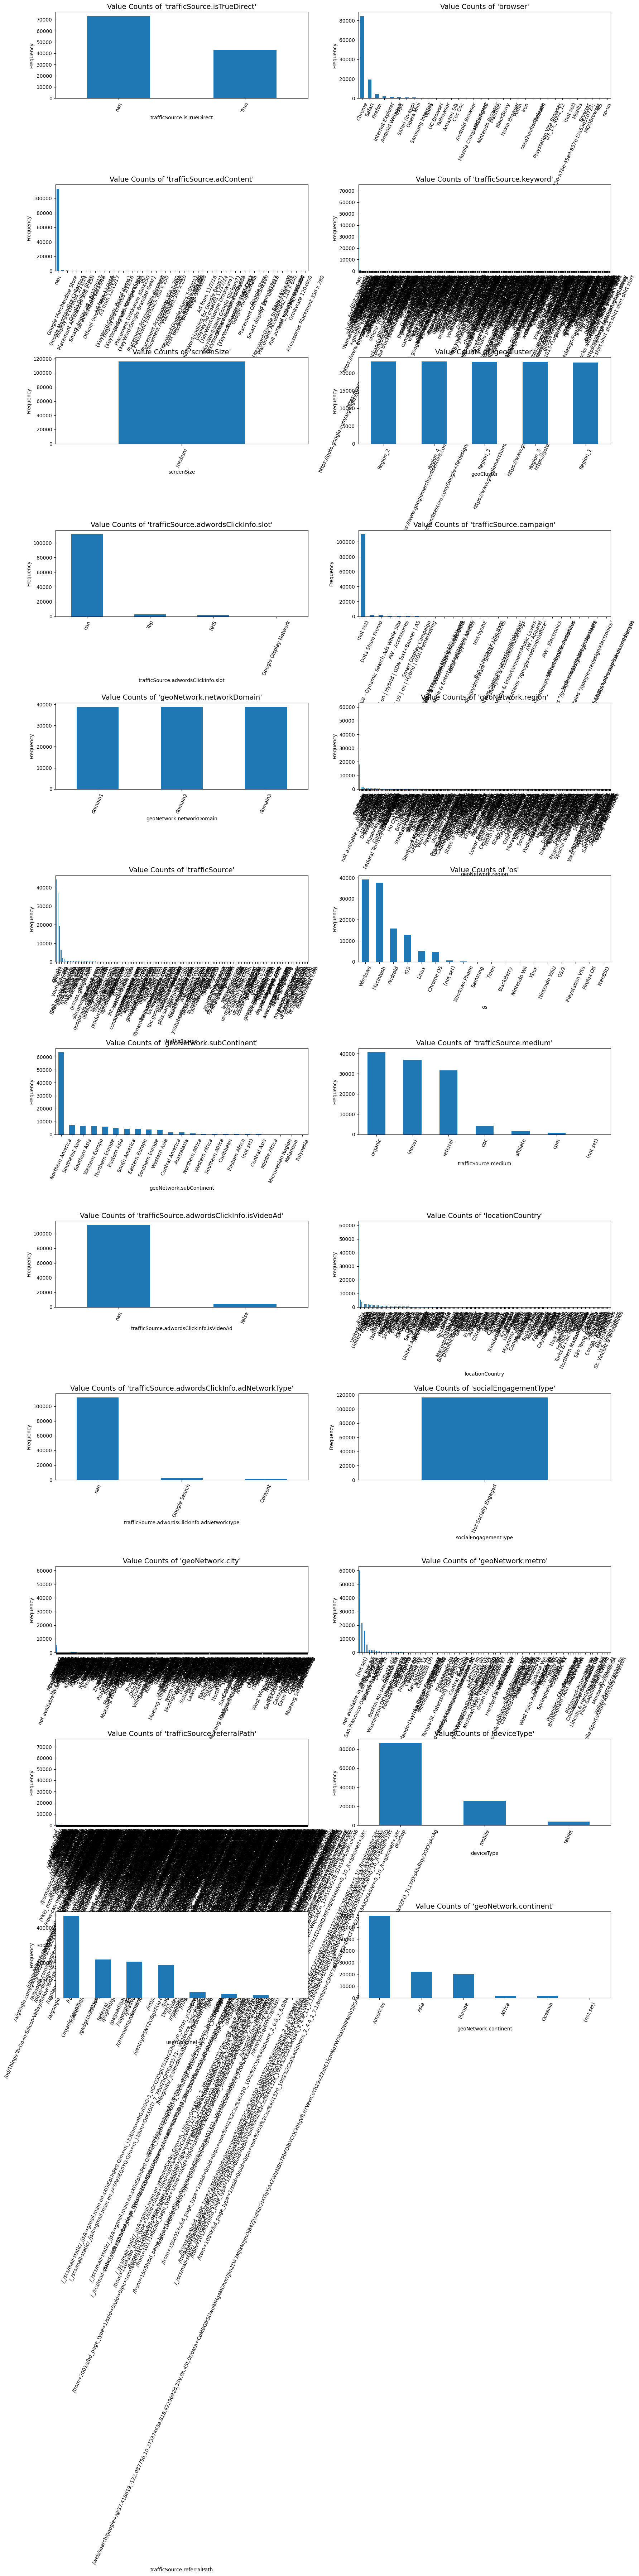

In [65]:
plot_object_column_bars(cleaned_train_df)

## Collapse rare categoris to "other" at 1% threshold function

In [66]:
def collapse_rare_categories_all_columns(df, threshold=0.01):
    """
    Replaces rare categories (below threshold) with 'Other' for all object-type columns.

    Parameters:
    - df: pd.DataFrame
    - threshold: float (frequency cutoff, e.g., 0.01 = 1%)

    Returns:
    - Modified DataFrame with rare values replaced by 'Other'
    """
    df_copy = df.copy()
    object_cols = df.select_dtypes(include='object').columns

    for col in object_cols:
        freq = df[col].value_counts(normalize=True, dropna=False)
        keep_values = freq[freq >= threshold].index
        df_copy[col] = df[col].apply(lambda x: x if x in keep_values else 'Other')

    return df_copy

In [67]:
new_train_df = collapse_rare_categories_all_columns(cleaned_train_df, threshold=0.01)

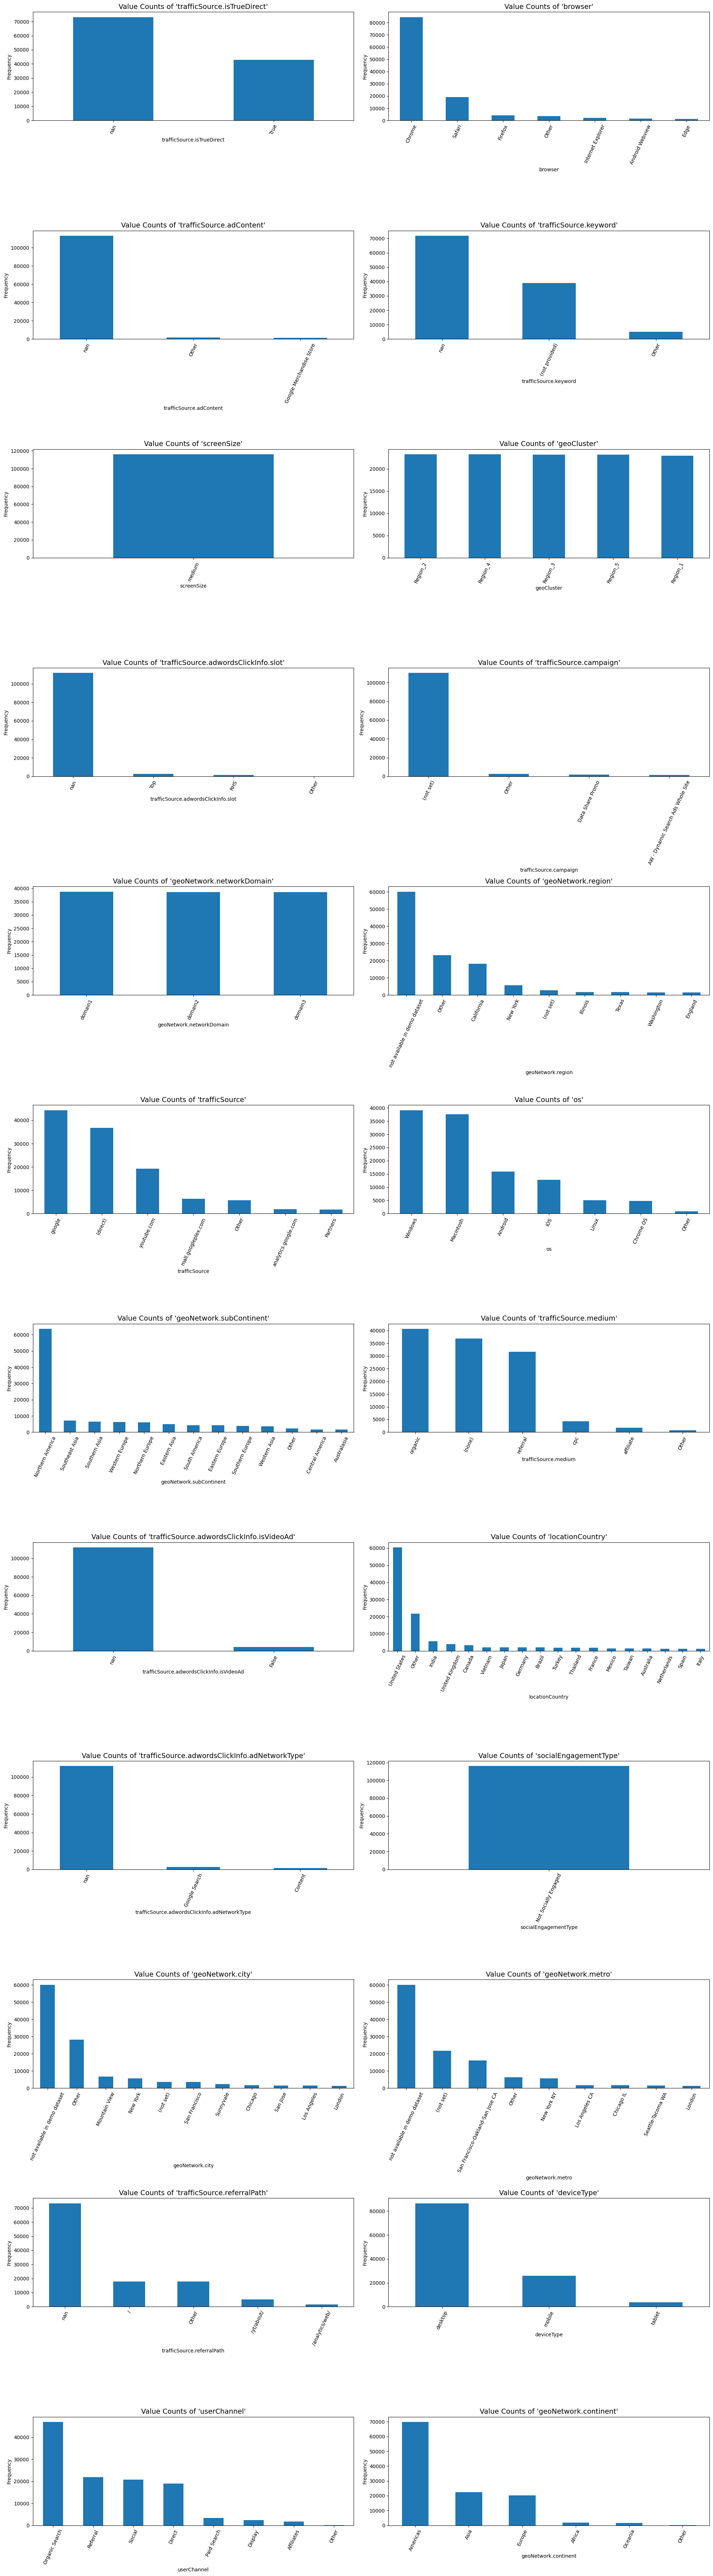

In [68]:
plot_object_column_bars(new_train_df)

# Drop unneccary col 

In [69]:
cleaned_train_df.columns


Index(['trafficSource.isTrueDirect', 'purchaseValue', 'browser',
       'trafficSource.adContent', 'trafficSource.keyword', 'screenSize',
       'geoCluster', 'trafficSource.adwordsClickInfo.slot', 'userId',
       'trafficSource.campaign', 'geoNetwork.networkDomain', 'gclIdPresent',
       'sessionNumber', 'geoNetwork.region', 'trafficSource', 'totals.visits',
       'sessionId', 'os', 'geoNetwork.subContinent', 'trafficSource.medium',
       'trafficSource.adwordsClickInfo.isVideoAd', 'locationCountry',
       'trafficSource.adwordsClickInfo.adNetworkType', 'socialEngagementType',
       'geoNetwork.city', 'trafficSource.adwordsClickInfo.page',
       'geoNetwork.metro', 'pageViews', 'locationZone',
       'trafficSource.referralPath', 'totals.bounces', 'date', 'deviceType',
       'userChannel', 'totalHits', 'sessionStart', 'geoNetwork.continent',
       'device.isMobile', 'new_visits'],
      dtype='object')

In [ ]:
def drop_columns(df):
    """
    Drops specified columns from the DataFrame.

    Parameters:
    - df: pd.DataFrame

    Returns:
    - pd.DataFrame with specified columns dropped
    """
    columns_to_drop = ["trafficSource.adContent","trafficSource.keyword","screenSize","trafficSource.adwordsClickInfo.slot"] 
    return df.drop(columns=columns_to_drop, errors='ignore')